[![Notebook Tutorial](__code/__all/notebook_tutorial.png)](https://neutronimaging.ornl.gov/ibeatles-strain-mapping-hdf5-loader/)

<img src='__docs/__all/notebook_rules.png' />

# Select Your IPTS 

In [1]:
import warnings
warnings.filterwarnings('ignore')

from __code.ibeatles_strain_mapping_hdf5_loader.main import Main
from __code import system
system.System.select_working_dir()
from __code.__all import custom_style
custom_style.style()

%matplotlib notebook

# Select HDF5 file created in the strain step of iBeatles

<img src='__code/ibeatles_strain_mapping_hdf5_loader/static/ibeatles_export_as_hdf5_menu.png' />

In [2]:
o_strain_display = Main(working_dir = system.System.get_working_dir())
#o_strain_display.select_hdf5_file()
#hdf_file = "/Users/j35/Desktop/fitting_y2023_m10_d24_h09_mn05.h5"
hdf_file = "/Users/j35/Desktop/fitting_y2023_m10_d25_h12_mn55.h5"
o_strain_display.load(hdf_file)

# Display data 

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import griddata
from matplotlib.image import _resample
from matplotlib.transforms import Affine2D

<IPython.core.display.Javascript object>


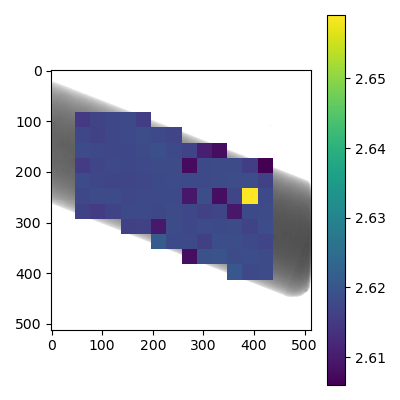

interactive(children=(FloatSlider(value=2.6060129175602396, description='min_value', max=2.6590903866703424, m…

<IPython.core.display.Javascript object>


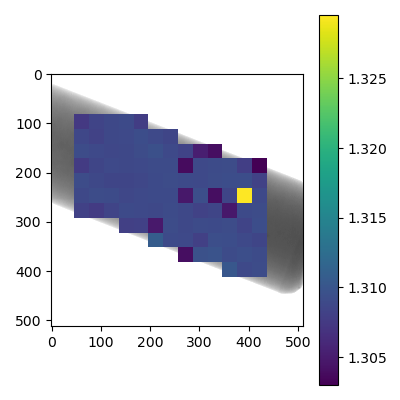

interactive(children=(FloatSlider(value=1.3030064587801198, description='min_value', max=1.3295451933351712, m…

<IPython.core.display.Javascript object>


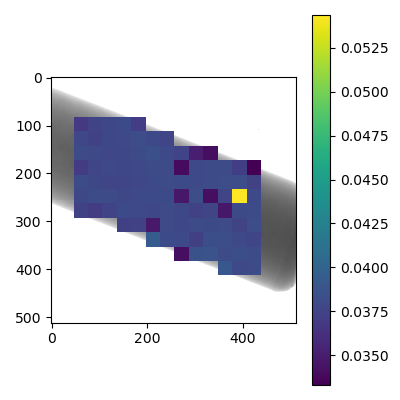

interactive(children=(FloatSlider(value=0.03331202123720847, description='min_value', max=0.05435780597555217,…

In [4]:
o_strain_display.process_data()
o_strain_display.display()   

<IPython.core.display.Javascript object>


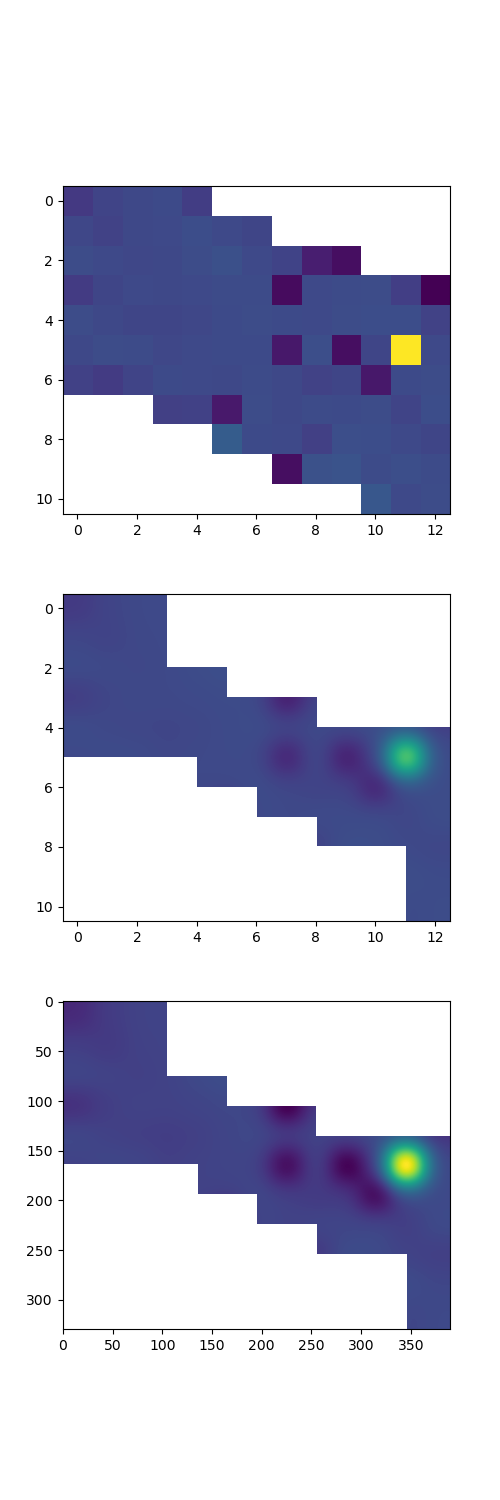

<IPython.core.display.Javascript object>


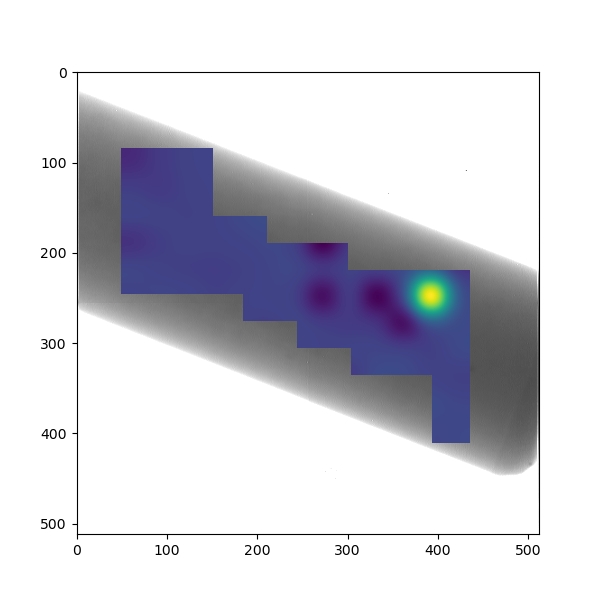

In [5]:
o_strain_display.display_with_interpolation()

In [5]:
data=o_strain_display.compact_lambda_2d
nbr_row = o_strain_display.nbr_row
nbr_column = o_strain_display.nbr_column

<IPython.core.display.Javascript object>


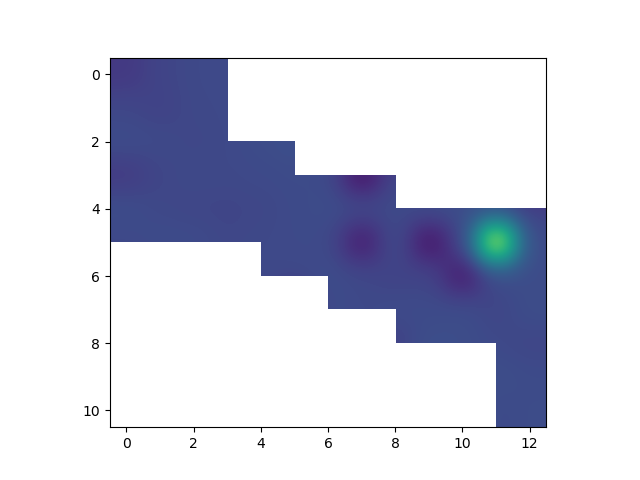

In [6]:
plt.figure(3)
# plt.imshow(data)
plt.imshow(data, interpolation='gaussian')

## extracting interpolated plot from matplotlib 

<IPython.core.display.Javascript object>


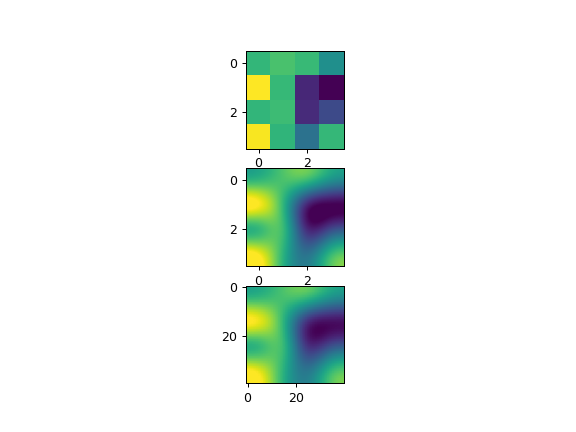

In [223]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import _resample
from matplotlib.transforms import Affine2D

np.random.seed(19680801)

grid = np.random.rand(4, 4)
scale_factor = 10
out_dimensions = (grid.shape[0]*scale_factor, grid.shape[1]*scale_factor)

fig, axs = plt.subplots(nrows=3)

transform = Affine2D().scale(scale_factor, scale_factor)
# Have to get an image to be able to resample
# Resample takes an _ImageBase or subclass, which require an Axes
img = axs[0].imshow(grid, interpolation='spline36', cmap='viridis')
interpolated = _resample(img, grid, out_dimensions, transform=transform)

axs[0].imshow(grid, cmap='viridis')
axs[1].imshow(grid, interpolation='spline36', cmap='viridis')
axs[2].imshow(interpolated, cmap='viridis')

### trying on my data 

<IPython.core.display.Javascript object>


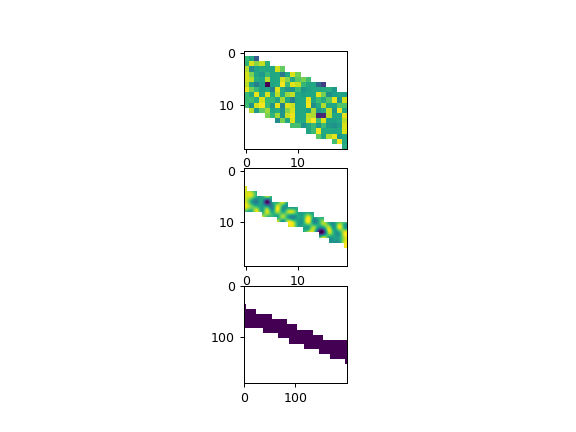

In [280]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import _resample
from matplotlib.transforms import Affine2D

grid = np.array(data)
index = np.isnan(grid)
# grid[index] = 0

scale_factor = 10
out_dimensions = (grid.shape[0]*scale_factor, grid.shape[1]*scale_factor)

fig, axs = plt.subplots(nrows=3)

transform = Affine2D().scale(scale_factor, scale_factor)
# Have to get an image to be able to resample
# Resample takes an _ImageBase or subclass, which require an Axes
img = axs[0].imshow(grid, interpolation='spline36', cmap='viridis')
interpolated = _resample(img, grid, out_dimensions, transform=transform)

axs[0].imshow(grid, cmap='viridis')
axs[1].imshow(grid, interpolation='spline36', cmap='viridis')


axs[2].imshow(interpolated, cmap='viridis')

### using zoom scikit

In [298]:
from scipy import ndimage

<IPython.core.display.Javascript object>


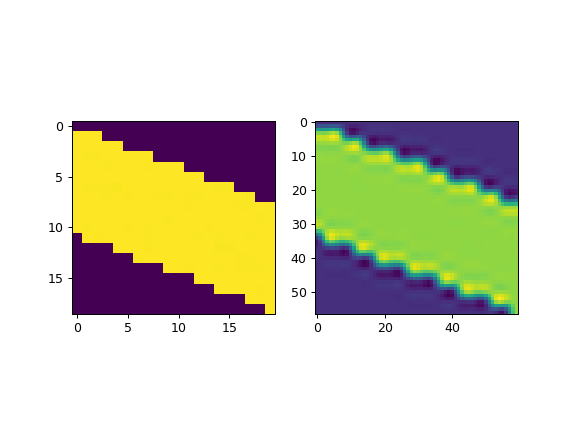

In [322]:
index = np.isnan(data)
data[index] = 0
new_data = ndimage.zoom(data, 3.0)

fig = plt.figure(num='zoom')
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(data)
ax2.imshow(new_data)